In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


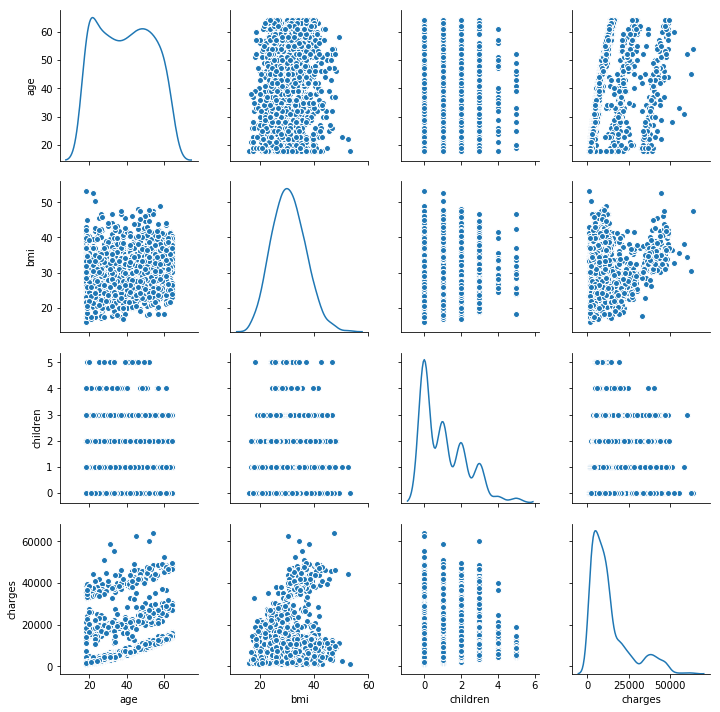

In [8]:
sns.pairplot(df, diag_kind = 'kde')

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [11]:
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)

le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)

le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)

In [14]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


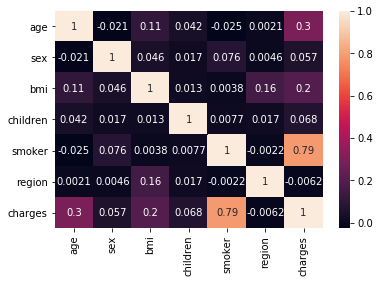

In [15]:
sns.heatmap(df.corr(), annot = True)

In [39]:
# from bokeh.io import output_notebook, show
# from bokeh.plotting import figure
# output_notebook()
# import scipy.special
# from bokeh.layouts import gridplot
# from bokeh.plotting import figure, show, output_file
# p = figure(title="Distribution of charges",tools="save",
#             background_fill_color="#E8DDCB")
# hist, edges = np.histogram(df.charges)
# p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
#         fill_color="#036564", line_color="#033649")
# p.xaxis.axis_label = 'x'
# p.yaxis.axis_label = 'Pr(x)'
# show(gridplot(p,ncols = 2, plot_width=400, plot_height=400, toolbar_location=None))

Text(0.5, 1.0, 'Distribution of charges for non smoker')

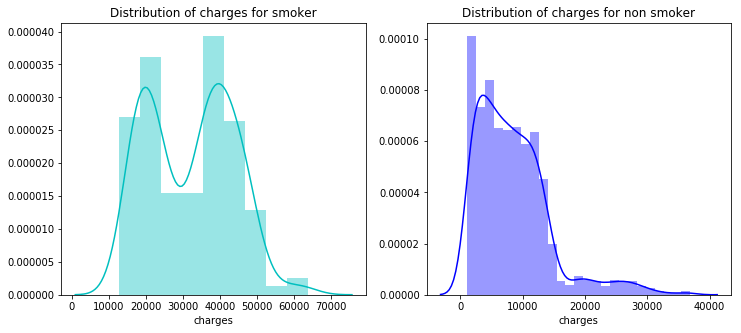

In [43]:
 f = plt.figure(figsize=(12,5))
ax = plt.subplot(121)
sns.distplot(df[(df.smoker == 1)] ['charges'], color  = 'c', ax = ax )
ax.set_title('Distribution of charges for smoker')


ax = plt.subplot(122)
sns.distplot(df[(df.smoker == 0)] ['charges'], color  = 'b', ax = ax )
ax.set_title('Distribution of charges for non smoker')

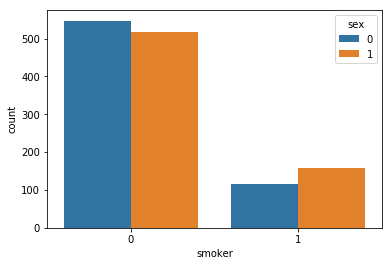

In [46]:
sns.countplot(x = 'smoker', data = df, hue = 'sex')

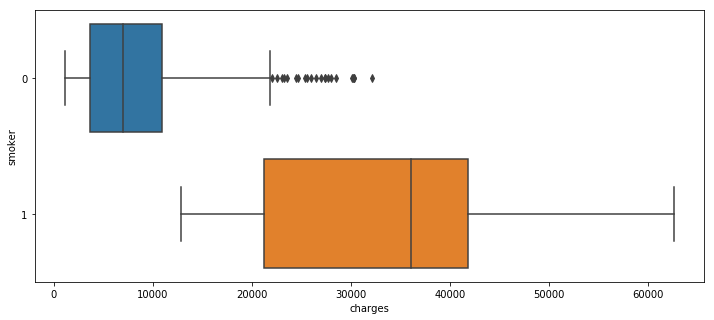

In [74]:
plt.figure(figsize = (12,5))
sns.boxplot(x = 'charges', y = 'smoker', data = df[(df.sex == 1)], orient = 'h')

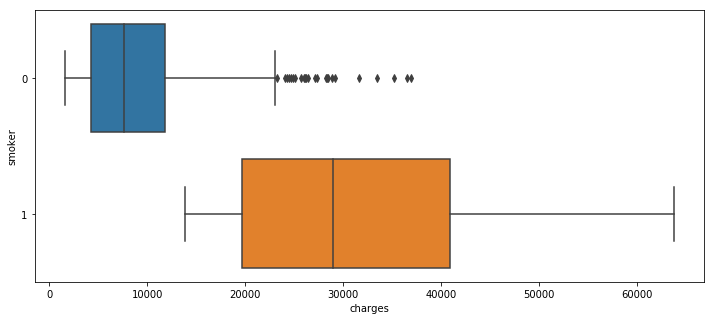

In [76]:
plt.figure(figsize = (12,5))
sns.boxplot(x = 'charges', y = 'smoker', data = df[(df.sex == 0)], orient = 'h')

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


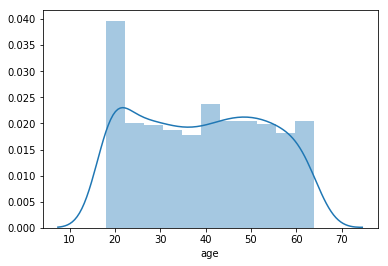

In [59]:
sns.distplot(df['age'])

In [60]:
#smokers less then age 18


df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [62]:
df[(df.age == 18) & (df.smoker == 1)]

,age,sex,bmi,children,smoker,region,charges
57,18,1,31.680,2,1,2,34303.16720
157,18,1,25.175,0,1,0,15518.18025
161,18,0,36.850,0,1,2,36149.48350
250,18,1,17.290,2,1,0,12829.45510
623,18,1,33.535,0,1,0,34617.84065
759,18,1,38.170,0,1,2,36307.79830
803,18,0,42.240,0,1,2,38792.68560
911,18,1,31.730,0,1,0,33732.68670
1033,18,1,21.565,0,1,0,13747.87235
1170,18,1,27.360,1,1,0,17178.68240


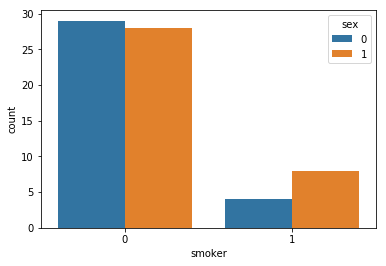

In [63]:
sns.countplot(x = 'smoker' , hue = 'sex', data = df[(df.age == 18)] )

In [71]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,3.402946,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,0.202492,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,2.770086,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,3.269426,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,3.414443,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,3.546560,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,3.972742,5.000000,1.000000,3.000000,63770.428010


In [70]:
IQR = df.quantile(0.75) - df.quantile(0.25) 
print ('Lower outliers' '\n', df.quantile(0.25) - (1.5 * IQR ))
print ('\n')
print ('Higher outliers' '\n',df.quantile(0.75) + (1.5 * IQR ))  

Lower outliers
 age            -9.000000
sex            -1.500000
bmi             2.853726
children       -3.000000
smoker          0.000000
region         -0.500000
charges    -13109.150897
dtype: float64


Higher outliers
 age            87.000000
sex             2.500000
bmi             3.962259
children        5.000000
smoker          0.000000
region          3.500000
charges     34489.350562
dtype: float64


In [68]:
df['bmi'] = np.log(df['bmi'])

In [69]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,3.328627,0,1,3,16884.92400
1,18,1,3.519573,1,0,2,1725.55230
2,28,1,3.496508,3,0,2,4449.46200
3,33,1,3.122585,0,0,1,21984.47061
4,32,1,3.363149,0,0,1,3866.85520
5,31,0,3.248046,0,0,2,3756.62160
6,46,0,3.509753,1,0,2,8240.58960
7,37,0,3.322875,3,0,1,7281.50560
8,37,1,3.395515,2,0,0,6406.41070
9,60,0,3.251924,0,0,1,28923.13692


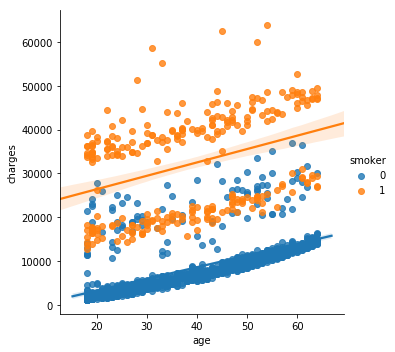

In [96]:
sns.lmplot(x = 'age', y = 'charges', hue  ='smoker', data = df)

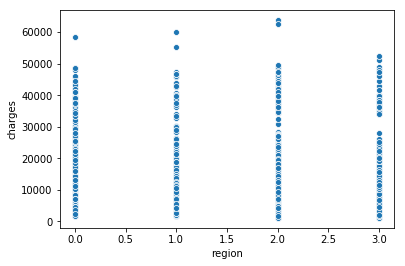

In [92]:
sns.scatterplot(x = 'region', y = 'charges', data = df)

In [87]:
df.region.unique()

array([3, 2, 1, 0], dtype=int64)

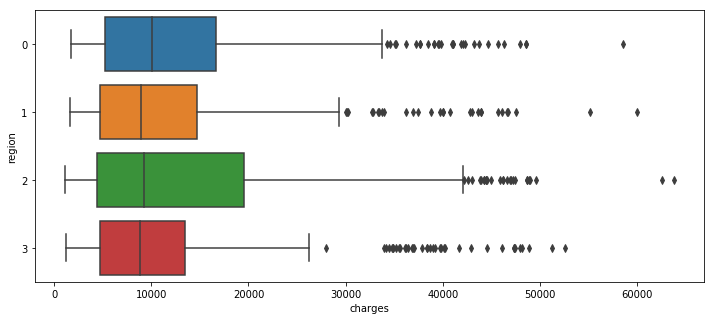

In [90]:
plt.figure(figsize = (12,5))
sns.boxplot(x = 'charges', y = 'region', data = df, orient = 'h')

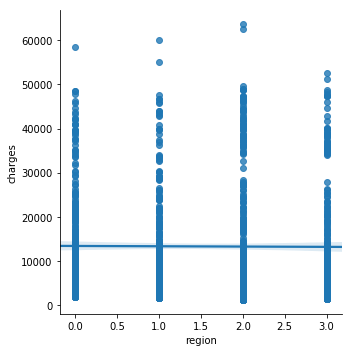

In [94]:
sns.lmplot(x = 'region', y = 'charges',  data = df)

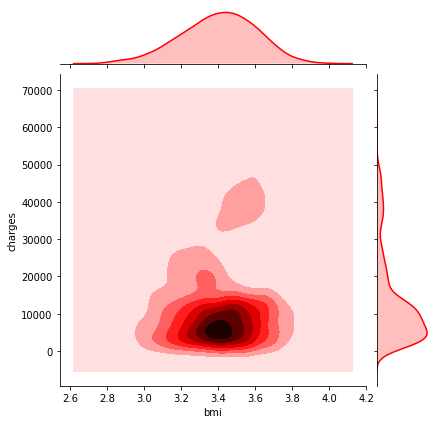

In [98]:
sns.jointplot(x="bmi", y="charges", data = df,kind="kde", color="r")

In [17]:
from sklearn.linear_model import LinearRegression
    

In [18]:
x = df.drop(columns=['charges','region'])


In [19]:
y = df['charges']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [22]:
lg = LinearRegression()

In [23]:
lg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
lg.predict(X_test)

array([ 8504.25952786,  6897.83941087, 36805.01178274,  9525.01640181,
       26834.15783554, 11236.53827843,   -56.51533813, 16996.53931939,
         558.86901551, 11292.49638115, 28504.83781808,  9398.41804442,
        5353.29915879, 38679.23753917, 40572.74207294, 37372.20787154,
       15387.38620563, 36033.31348368,  9292.40371143, 31304.88883148,
        4274.20100087, 10592.29487706,  2708.68730205,  6493.02810907,
       11227.74003336, 12498.97075764, 14877.16806499,  5963.85891638,
        9503.12017865,  2360.10282672,  9434.17913244, 12999.67895742,
        4585.98098388,  3265.96837276,  4840.89651399, 12653.62349137,
        2194.59265213,  9123.3897013 , 33175.85413453, 32812.24167496,
        4132.88277765,  4243.29138982, 14495.05758702, 11538.30865769,
        9023.27584285, 12650.54437942,  5036.97193595,  3406.53561573,
       35766.6625433 ,  9379.5276352 , 16062.93310871,  2535.59415356,
       12177.97650916,  1021.65843332, 13742.82492927, 12262.32230678,
      

In [25]:
lg.score(X_test,y_test)

0.7680881643600721

In [26]:
import math
# Example points in 3-dimensional space...
x = (3, 5)
y = (7, 5)
distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)]))
print("Euclidean distance from x to y: ",distance)

('Euclidean distance from x to y: ', 4.0)


In [29]:
lg.

5

In [4]:
x = [25, 7, 22, 33, 18, 15]

In [5]:
import numpy as np

In [6]:
np.mean(x)

20.0

In [7]:
np.std(x)

8.12403840463596